STEP 1: Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import streamlit as st


In [2]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.5 MB/s eta 0:00:00


STEP 2: Load Dataset

In [6]:
# Load Kaggle Titanic dataset (make sure train.csv and test.csv are in same folder)
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

print("Training shape:", train_data.shape)
print("Test shape:", test_data.shape)


Training shape: (891, 12)
Test shape: (418, 11)


STEP 3: Data Cleaning & Preprocessing

In [7]:
# Fill missing values
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
test_data["Age"].fillna(test_data["Age"].median(), inplace=True)

train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)
test_data["Embarked"].fillna(test_data["Embarked"].mode()[0], inplace=True)

test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

# Drop Cabin column if it exists
if 'Cabin' in train_data.columns:
    train_data.drop("Cabin", axis=1, inplace=True)
if 'Cabin' in test_data.columns:
    test_data.drop("Cabin", axis=1, inplace=True)

# Encode categorical data
le = LabelEncoder()
train_data["Sex"] = le.fit_transform(train_data["Sex"])
test_data["Sex"] = le.transform(test_data["Sex"])

train_data["Embarked"] = le.fit_transform(train_data["Embarked"])
test_data["Embarked"] = le.transform(test_data["Embarked"])

/tmp/ipython-input-2551914814.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
/tmp/ipython-input-2551914814.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

STEP 4: Data Visualization (Exploratory Data Analysis)

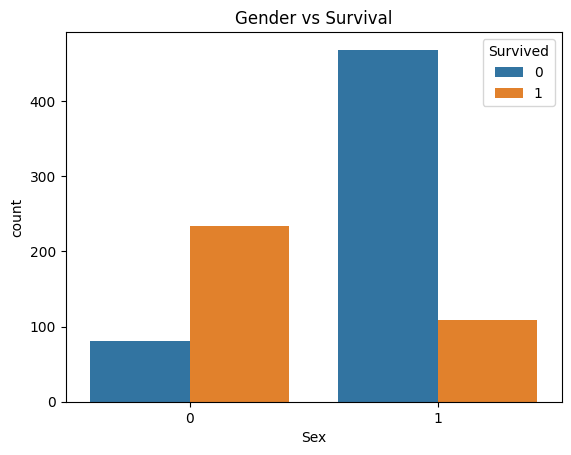

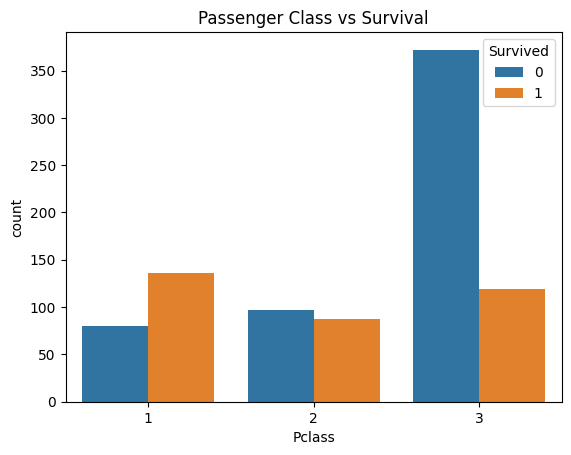

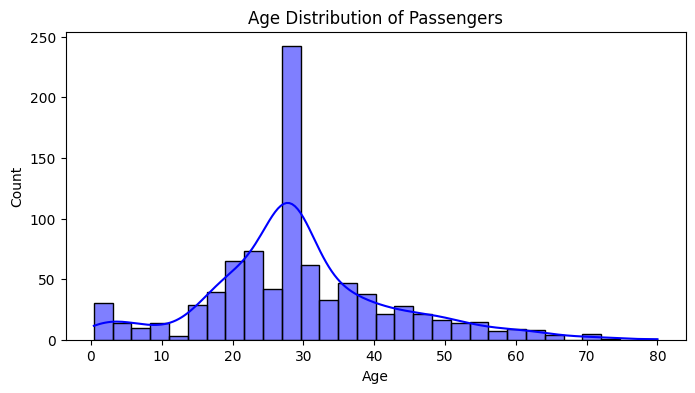

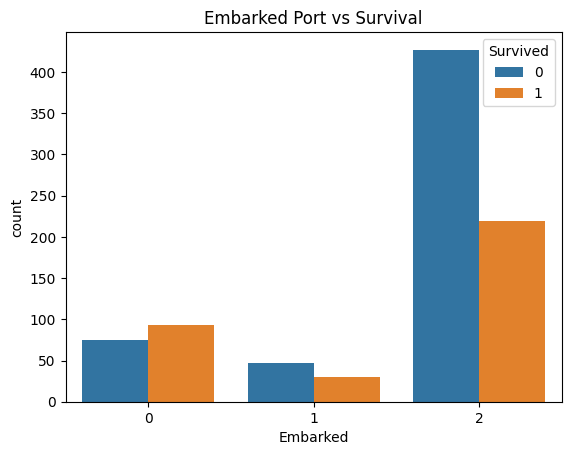

In [8]:
# Gender vs Survival
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title("Gender vs Survival")
plt.show()

# Passenger Class vs Survival
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title("Passenger Class vs Survival")
plt.show()

# Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(train_data['Age'], kde=True, bins=30, color='blue')
plt.title("Age Distribution of Passengers")
plt.show()

# Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title("Embarked Port vs Survival")
plt.show()


STEP 5: Feature Selection

In [9]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_data[features]
y = train_data["Survived"]
X_test_final = test_data[features]


STEP 6: Model Training

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

STEP 7: Evaluation

In [11]:
y_pred = model.predict(X_val)

print("✅ Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


✅ Accuracy: 0.8212290502793296

Confusion Matrix:
 [[92 13]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



STEP 8: Predict on Test Data + Save Submission File

In [12]:
predictions = model.predict(X_test_final)

submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})

submission.to_csv("submission.csv", index=False)
print("\n✅ 'submission.csv' created successfully!")
print("Duplicate PassengerIds:", submission["PassengerId"].duplicated().sum())



✅ 'submission.csv' created successfully!
Duplicate PassengerIds: 0


In [13]:
import pickle
pickle.dump(model, open('titanic_model.pkl', 'wb'))
